<a href="https://colab.research.google.com/github/adeliapebriani/Classification-and-Regression-Tree/blob/main/CART-using-sick.data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score

### 1. **Dataset**

In [18]:
filename = 'https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Dataset/sick.data' #load data
data = pd.read_csv(filename, names=["age","sex","on thyroxine","query on thyroxine","on antithyroid medication","sick","pregnant","thyroid surgery","I131 treatment","query hypothyroid","query hyperthyroid","lithium","goitre","tumor","hypopituitary","psych","TSH measured","TSH","T3 measured","T3","TT4 measured","TT4","T4U measured","T4U","FTI measured","FTI","TBG measured","TBG","referral source","class"])
data.head(10) #menampilkan 10 data pertama

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
5,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,?,t,183,t,1.3,t,141,f,?,other,negative.|3434
6,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,72,t,0.92,t,78,f,?,other,negative.|1595
7,80,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.2,t,0.6,t,80,t,0.7,t,115,f,?,SVI,sick.|1367
8,66,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,0.6,t,2.2,t,123,t,0.93,t,132,f,?,SVI,negative.|1787
9,68,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.4,t,1.6,t,83,t,0.89,t,93,f,?,SVI,negative.|2534


### **2. preprocessing**

In [19]:
for i in range(0, len(data['class'])):
  if 'negative' in data['class'][i]:
    data['class'][i]= '0'
  elif 'sick' in data['class'][i]:
     data['class'][i]= '1'
data.head(10)
data['class'] = data['class'].astype(int)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2800 non-null   object
 1   sex                        2800 non-null   object
 2   on thyroxine               2800 non-null   object
 3   query on thyroxine         2800 non-null   object
 4   on antithyroid medication  2800 non-null   object
 5   sick                       2800 non-null   object
 6   pregnant                   2800 non-null   object
 7   thyroid surgery            2800 non-null   object
 8   I131 treatment             2800 non-null   object
 9   query hypothyroid          2800 non-null   object
 10  query hyperthyroid         2800 non-null   object
 11  lithium                    2800 non-null   object
 12  goitre                     2800 non-null   object
 13  tumor                      2800 non-null   object
 14  hypopitu

In [20]:
print("Jumlah kemunculan nilai pada atribut sex: \n", data['sex'].value_counts())
data['sex'] = data['sex'].replace('F', 0)
data['sex'] = data['sex'].replace('M', 1)
data['sex'] = data['sex'].replace('?', 0)
print("Jumlah kemunculan nilai pada atribut sex setelah penghilangan nilai null: \n", data['sex'].value_counts())

Jumlah kemunculan nilai pada atribut sex: 
 F    1830
M     860
?     110
Name: sex, dtype: int64
Jumlah kemunculan nilai pada atribut sex setelah penghilangan nilai null: 
 0    1940
1     860
Name: sex, dtype: int64


In [21]:
data = data.replace('?', np.nan)

In [22]:
data.isnull().sum() #menampilkan jumlah nilai null dari tiap atribut

age                             1
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           284
T3 measured                     0
T3                            585
TT4 measured                    0
TT4                           184
T4U measured                    0
T4U                           297
FTI measured                    0
FTI                           295
TBG measured                    0
TBG                          2800
referral source                 0
class         

In [23]:
print("Jumlah kemunculan nilai pada atribut on thyroxine: \n", data['on thyroxine'].value_counts())
data['on thyroxine'] = data['on thyroxine'].replace('f', 0)
data['on thyroxine'] = data['on thyroxine'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query on thyroxine: \n", data['query on thyroxine'].value_counts())
data['query on thyroxine'] = data['query on thyroxine'].replace('f', 0)
data['query on thyroxine'] = data['query on thyroxine'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut on antithyroid medication: \n", data['on antithyroid medication'].value_counts())
data['on antithyroid medication'] = data['on antithyroid medication'].replace('f', 0)
data['on antithyroid medication'] = data['on antithyroid medication'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut sick: \n", data['sick'].value_counts())
data['sick'] = data['sick'].replace('f', 0)
data['sick'] = data['sick'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut pregnant: \n", data['pregnant'].value_counts())
data['pregnant'] = data['pregnant'].replace('f', 0)
data['pregnant'] = data['pregnant'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut thyroid surgery: \n", data['thyroid surgery'].value_counts())
data['thyroid surgery'] = data['thyroid surgery'].replace('f', 0)
data['thyroid surgery'] = data['thyroid surgery'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut I131 treatment: \n", data['I131 treatment'].value_counts())
data['I131 treatment'] = data['I131 treatment'].replace('f', 0)
data['I131 treatment'] = data['I131 treatment'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query hypothyroid: \n", data['query hypothyroid'].value_counts())
data['query hypothyroid'] = data['query hypothyroid'].replace('f', 0)
data['query hypothyroid'] = data['query hypothyroid'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query hyperthyroid: \n", data['query hyperthyroid'].value_counts())
data['query hyperthyroid'] = data['query hyperthyroid'].replace('f', 0)
data['query hyperthyroid'] = data['query hyperthyroid'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut lithium: \n", data['lithium'].value_counts())
data['lithium'] = data['lithium'].replace('f', 0)
data['lithium'] = data['lithium'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut goitre: \n", data['goitre'].value_counts())
data['goitre'] = data['goitre'].replace('f', 0)
data['goitre'] = data['goitre'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut tumor: \n", data['tumor'].value_counts())
data['tumor'] = data['tumor'].replace('f', 0)
data['tumor'] = data['tumor'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut hypopituitary: \n", data['hypopituitary'].value_counts())
data['hypopituitary'] = data['hypopituitary'].replace('f', 0)
data['hypopituitary'] = data['hypopituitary'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut psych: \n", data['psych'].value_counts())
data['psych'] = data['psych'].replace('f', 0)
data['psych'] = data['psych'].replace('t', 1)

Jumlah kemunculan nilai pada atribut on thyroxine: 
 f    2470
t     330
Name: on thyroxine, dtype: int64


Jumlah kemunculan nilai pada atribut query on thyroxine: 
 f    2760
t      40
Name: query on thyroxine, dtype: int64


Jumlah kemunculan nilai pada atribut on antithyroid medication: 
 f    2766
t      34
Name: on antithyroid medication, dtype: int64


Jumlah kemunculan nilai pada atribut sick: 
 f    2690
t     110
Name: sick, dtype: int64


Jumlah kemunculan nilai pada atribut pregnant: 
 f    2759
t      41
Name: pregnant, dtype: int64


Jumlah kemunculan nilai pada atribut thyroid surgery: 
 f    2761
t      39
Name: thyroid surgery, dtype: int64


Jumlah kemunculan nilai pada atribut I131 treatment: 
 f    2752
t      48
Name: I131 treatment, dtype: int64


Jumlah kemunculan nilai pada atribut query hypothyroid: 
 f    2637
t     163
Name: query hypothyroid, dtype: int64


Jumlah kemunculan nilai pada atribut query hyperthyroid: 
 f    2627
t     173
Name: query hyperthyroi

In [24]:
data.isnull().sum()

age                             1
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           284
T3 measured                     0
T3                            585
TT4 measured                    0
TT4                           184
T4U measured                    0
T4U                           297
FTI measured                    0
FTI                           295
TBG measured                    0
TBG                          2800
referral source                 0
class         

In [25]:
data.drop('TBG', inplace=True, axis=1)


In [26]:
data.drop('TBG measured', inplace=True, axis=1)
data.drop('T4U measured', inplace=True, axis=1)
data.drop('TSH measured', inplace=True, axis=1)
data.drop('FTI measured', inplace=True, axis=1)
data.drop('T3 measured', inplace=True, axis=1)
data.drop('TT4 measured', inplace=True, axis=1)
data.drop('referral source', inplace=True, axis=1)

In [27]:
data.head(10)


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,class
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,0
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,0
2,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,0
3,70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,0
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,0
5,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.03,NaN,183,1.3,141,0
6,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,72,0.92,78,0
7,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.2,0.6,80,0.7,115,1
8,66,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.6,2.2,123,0.93,132,0
9,68,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.4,1.6,83,0.89,93,0


In [28]:
column = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
for i in range(0, len(column)):
  data[column[i]] = data[column[i]].astype(float)

In [29]:
mean = data["age"].mean()
data["age"] = data["age"].replace(np.nan, mean)

mean = data["TSH"].mean()
data["TSH"] = data["TSH"].replace(np.nan, mean)


mean = data["T3"].mean()
data["T3"] = data["T3"].replace(np.nan, mean)
data

mean = data["TT4"].mean()
data["TT4"] = data["TT4"].replace(np.nan, mean)

mean = data["T4U"].mean()
data["T4U"] = data["T4U"].replace(np.nan, mean)

mean = data["FTI"].mean()
data["FTI"] = data["FTI"].replace(np.nan, mean)

data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,class
0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30000,2.500000,125.0,1.140000,109.000000,0
1,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10000,2.000000,102.0,0.997912,110.787984,0
2,46.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98000,2.024966,109.0,0.910000,120.000000,0
3,70.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16000,1.900000,175.0,0.997912,110.787984,0
4,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72000,1.200000,61.0,0.870000,70.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.70000,2.024966,155.0,1.050000,148.000000,0
2796,73.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4.67215,0.700000,63.0,0.880000,72.000000,1
2797,75.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.67215,2.024966,147.0,0.800000,183.000000,0
2798,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.40000,2.024966,100.0,0.830000,121.000000,0


In [30]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
class                        0
dtype: int64

In [31]:
data.to_csv("Dataclean.csv")
data.to_csv("Dataclean.data")

### 3. **CART** DENGAN GINI INDEX

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X=data.iloc[:,0:21].values
#Label Set
y=data.iloc[:,21].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)


model=DecisionTreeClassifier(criterion='gini', splitter='best', random_state=100)
'''model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='random')'''

model.fit(X_train,y_train)

y_trained = model.predict(X_train)
accuracy_score_train = accuracy_score(y_trained, y_train)
print("Akurasi Score Data Train: ", accuracy_score_train)

y_tested = model.predict(X_test)
accuracy_score_tested = accuracy_score(y_test, y_tested)
print("Akurasi Score Data Test: ", accuracy_score_tested)

conf_mat = confusion_matrix(y_test, y_tested)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test, y_tested))


print("Mean cross validation score for training set: ",np.mean(cross_val_score(model,X_train,y_train,cv=5))*100)
print("Mean cross validation score for testing set: ",np.mean(cross_val_score(model,X_test,y_test,cv=5))*100)

Akurasi Score Data Train:  1.0
Akurasi Score Data Test:  0.9767857142857143
Confusion Matrix: 
 [[523  11]
 [  2  24]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       534
           1       0.69      0.92      0.79        26

    accuracy                           0.98       560
   macro avg       0.84      0.95      0.89       560
weighted avg       0.98      0.98      0.98       560

Mean cross validation score for training set:  97.58928571428571
Mean cross validation score for testing set:  96.96428571428571


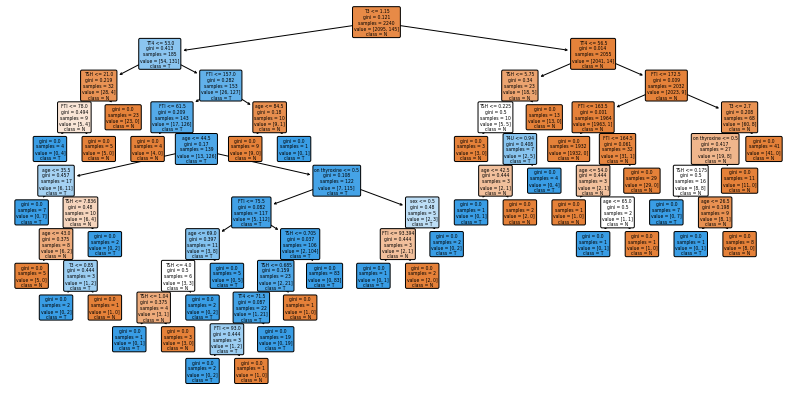

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score,GridSearchCV

plt.figure(figsize=(14,7))
_ = plot_tree(model,filled=True,rounded=True,class_names=['N','T'],feature_names=data.columns)

In [34]:
'''from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt

import sys

rt = model.fit(X_train, y_train)

str1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(rt, out_file=dot_data, filled=True, class_names = '01')

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()'''

'from IPython.display import Image  \nfrom sklearn import tree\nimport matplotlib.image as mpimg\nimport pydotplus\nimport io\nimport matplotlib.pyplot as plt\n\nimport sys\n\nrt = model.fit(X_train, y_train)\n\nstr1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"\nsys.path.append(str1)\n\ndot_data = io.StringIO()\ntree.export_graphviz(rt, out_file=dot_data, filled=True, class_names = \'01\')\n\n# Draw graph\npydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(\'dt.png\')\n\nplt.figure(figsize=(100, 100))\nimg = mpimg.imread(\'dt.png\')\nimgplot = plt.imshow(img)\n\nplt.show()'

### **4. TREE PRUNING**

In [35]:
path = model.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print(ccp_alphas)

[0.         0.0002231  0.00042614 0.00044987 0.00053571 0.00059524
 0.00059524 0.00061359 0.00068027 0.00074405 0.00079365 0.00080357
 0.00080357 0.00095663 0.00124367 0.00126165 0.001447   0.0015625
 0.00285254 0.00509168 0.01174655 0.07452802]


In [36]:
tree_list = []

for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=100,ccp_alpha=alpha)
    tree.fit(X_train,y_train)
    tree_list.append(tree)

    
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07452801658645551


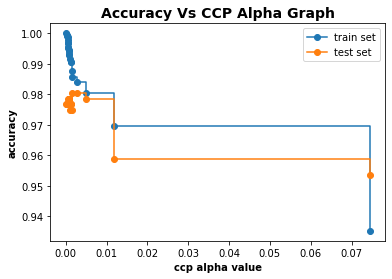

In [37]:
training_score = [tree.score(X_train,y_train) for tree in tree_list]
testing_score = [tree.score(X_test,y_test) for tree in tree_list]

fig,ax = plt.subplots()
ax.set_xlabel("ccp alpha value",fontweight='bold')
ax.set_ylabel("accuracy",fontweight='bold')
ax.set_title("Accuracy Vs CCP Alpha Graph",fontsize=14,fontweight='bold')
ax.plot(ccp_alphas,training_score,label='train set',marker='o',drawstyle='steps-post')
ax.plot(ccp_alphas,testing_score,label='test set',marker='o',drawstyle='steps-post')
ax.legend()
plt.show()

In [38]:
model_list = pd.DataFrame({'alpha':ccp_alphas,'train score':training_score,'test score':testing_score})
model_list['score diff'] = model_list['train score'] - model_list['test score']

In [39]:
model_list.head()

,alpha,train score,test score,score diff
0,0.000000,1.000000,0.976786,0.023214
1,0.000223,0.999554,0.976786,0.022768
2,0.000426,0.999107,0.976786,0.022321
3,0.000450,0.998661,0.976786,0.021875
4,0.000536,0.997768,0.976786,0.020982


In [40]:
model_list[model_list['score diff']==model_list['score diff'].min()]

,alpha,train score,test score,score diff
21,0.074528,0.935268,0.953571,-0.018304


In [41]:
model_list[model_list['test score']==model_list['test score'].max()]

,alpha,train score,test score,score diff
17,0.001563,0.985714,0.980357,0.005357
18,0.002853,0.983929,0.980357,0.003571


In [42]:
model_pruned=DecisionTreeClassifier(criterion='gini', ccp_alpha=0.002853, splitter='best')
'''model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='random')'''

model_pruned.fit(X_train,y_train)
  
y_trained = model_pruned.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_trained)
print("Akurasi Score Data Train: ", accuracy_score_train)

conf_mat = confusion_matrix(y_train, y_trained)
print("Confusion Matrix test: \n", conf_mat)
print("\n")

y_tested = model_pruned.predict(X_test)
accuracy_score_tested = accuracy_score(y_test, y_tested)
print("Akurasi Score Data Test: ", accuracy_score_tested)

conf_mat = confusion_matrix(y_test, y_tested)
print("Confusion Matrix test: \n", conf_mat)
print("\n")

from sklearn.metrics import classification_report
print (classification_report(y_test, y_tested))

print("Mean cross validation score for training set: ",np.mean(cross_val_score(model_pruned,X_train,y_train,cv=5))*100)
print("Mean cross validation score for testing set: ",np.mean(cross_val_score(model_pruned,X_test,y_test,cv=5))*100)

Akurasi Score Data Train:  0.9839285714285714
Confusion Matrix test: 
 [[2078   17]
 [  19  126]]


Akurasi Score Data Test:  0.9803571428571428
Confusion Matrix test: 
 [[531   3]
 [  8  18]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       534
           1       0.86      0.69      0.77        26

    accuracy                           0.98       560
   macro avg       0.92      0.84      0.88       560
weighted avg       0.98      0.98      0.98       560

Mean cross validation score for training set:  98.16964285714285
Mean cross validation score for testing set:  96.96428571428571


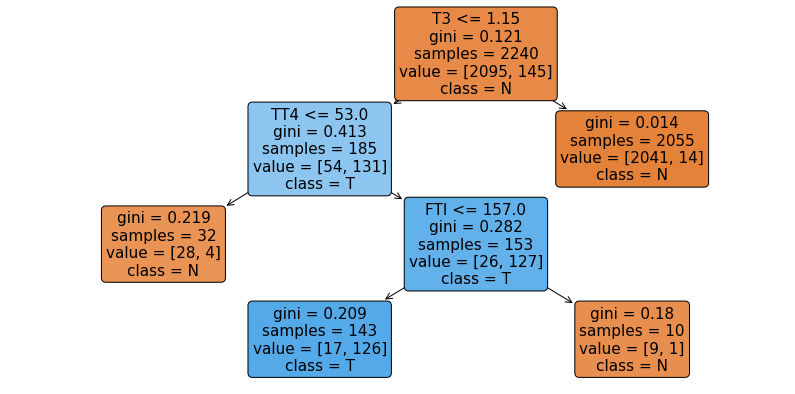

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score,GridSearchCV

plt.figure(figsize=(14,7))
_ = plot_tree(model_pruned,filled=True,rounded=True,class_names=['N','T'],feature_names=data.columns)